In [1]:
import qiskit
import numpy as np
import sys
sys.path.insert(1,'../')

from vqa.circuits import *
from vqa.vqm import *
from vqa.bounds import sld_qfim, cfim, sld_bound, cls_bound
from vqa.fitting import *
from vqa.entanglement import concentratable_entanglement

/Users/anhkhoi/Documents/PhysRes/Quantum_Metrology/Full_code/vmetro/run/../vqa/circuits.py:292: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if values[i] == 'random':


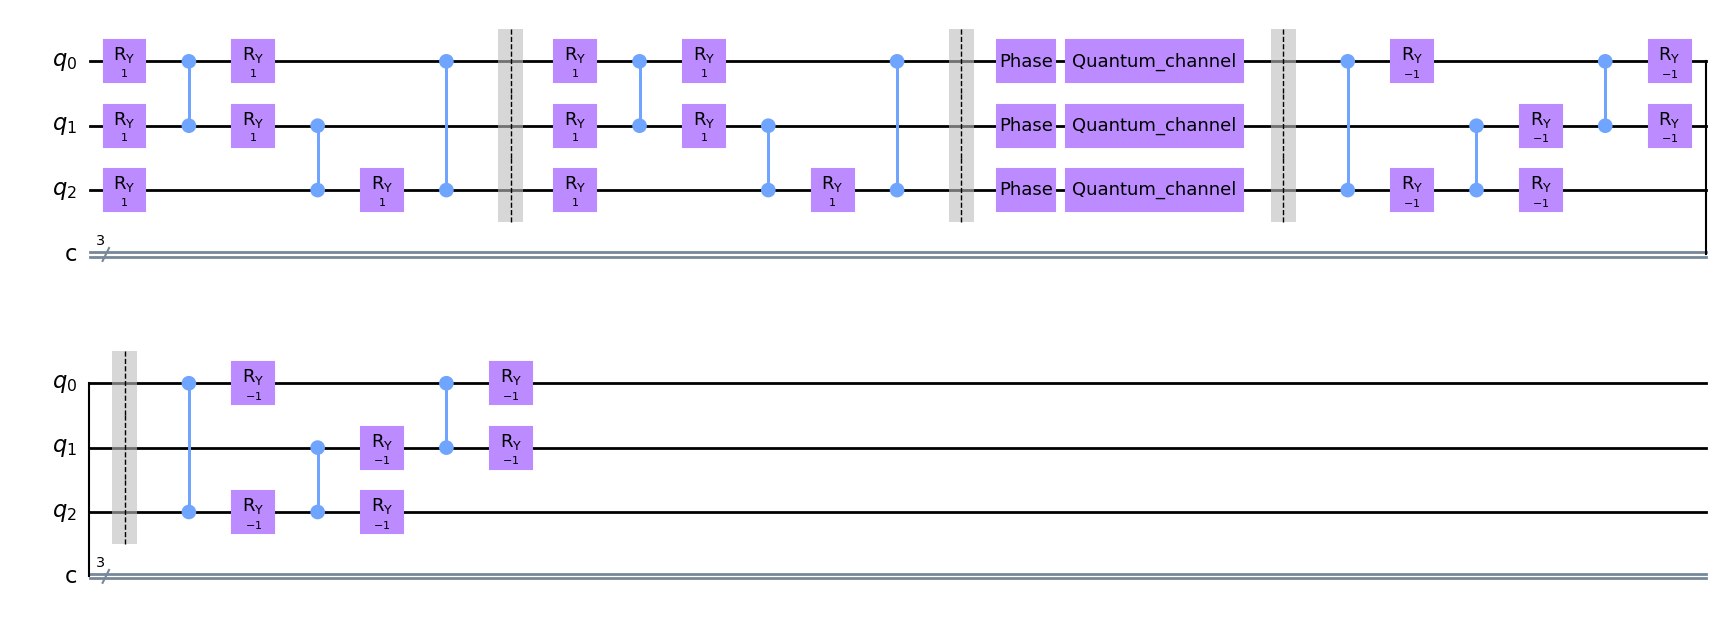

In [2]:
num_qubits = 3
t = 1.0

cirs =[ring_ansatz, u_phase, dephasing, ring_ansatz_inv]
coefs = [2,t,t,2] #num_players, time, 
phases = np.array([np.pi/6., np.pi/6., np.pi/6.])

lamb = 0.1
y = vqa.constants.lamb2y(t,lamb) #fdephasing
params = create_params(cirs,coefs,num_qubits,[[1],phases,[y],[1]])

# setup a model 
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
model = qc_add(qc, cirs, coefs, params)
model.draw('mpl')

0 0.6908851871555624
1 0.6235008457847446
2 0.582052830893535
3 0.55871405300536
4 0.5422207445294189
5 0.5283201980176844
6 0.5149979623844276
7 0.5023665054429671
8 0.4910477676054258
9 0.48164070482680954
10 0.47289333681457435
11 0.46535017132990975
12 0.4580029750622896
13 0.4526860288126596
14 0.4476576000201459
15 0.4435924519621117
16 0.43774907409179575
17 0.4344061327411951
18 0.43019990242758266
19 0.42758821155562676
20 0.4236370255014823
21 0.42104810945565097
22 0.4172928547110313
23 0.4147747274729108
24 0.40866717389709784
25 0.40241868209592524
26 0.39965812643046494
27 0.391713230408944
28 0.38375869120488704
29 0.3744826515770775
30 0.36941010074958824
31 0.3574875518289169
32 0.34858156575996957
33 0.3362263765703547
34 0.3261423486140469
35 0.3166799244910887
36 0.31071734910332516
37 0.3064282293385402
38 0.3046476376942734
39 0.3026148409149968
40 0.30323127389235993
41 0.2985752562030325
42 0.29852086051228044
43 0.29359850538356913
44 0.2960659791155047
45 0.29

(0.0, 100.0)

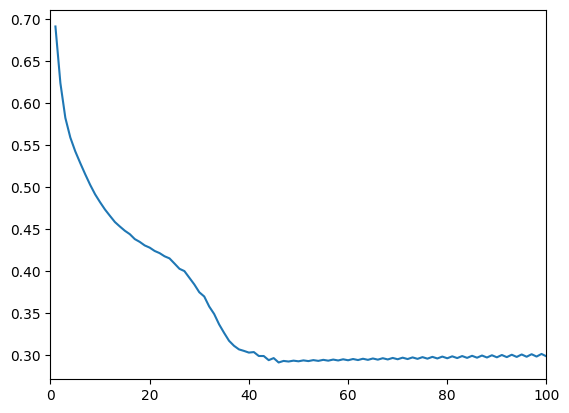

In [3]:
# training sld bound
# allways remember reset qc

import matplotlib.pyplot as plt
num_steps = 100

params, costs = training(qc,
               cirs,
               coefs,  
               params,
               which_train = [0,-1],
               cost_func = bound_sld_cls,
               grad_func = grad_cost,
               opt_func = adam,
               num_steps = num_steps)

# plot
iterations = list(range(1, num_steps+1))
plt.plot(iterations, np.real(costs), '-')
plt.xlim(0, num_steps)

In [4]:
np.savetxt("../experiments/ring_ansatz/" + str(num_qubits) + "/dephasing/costs_01.csv", costs, delimiter=",")
np.savetxt("../experiments/ring_ansatz/" + str(num_qubits) + "/dephasing/params_01.csv", np.concatenate((params[0],params[-1]), axis=None), delimiter=",")

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/ring_ansatz/3/dephasing/costs_01.csv'

In [9]:
# quantum fisher information matrix

qc = qiskit.QuantumCircuit(num_qubits,num_qubits)
qfim = sld_qfim(qc,cirs,coefs,params)
#print(qfim)

# cfim
cfim = vqa.bounds.cfim(qc,cirs,coefs,params)
#print(cfim)


# cls bound and quantum bound
cb = cls_bound(qc,cirs,coefs,params)
qd = sld_bound(qc, cirs, coefs, params)

inv_cfim = inv(cfim + np.eye(len(cfim)) * 10e-10)
inv_qfim = inv(qfim + np.eye(len(qfim)) * 10e-10)

# calcualte concentratable_entanglement
qc1 = ring_ansatz(qc.copy(), coefs[0], params[0])
ce = vqa.entanglement.concentratable_entanglement(qc1)

print(cb, qd, np.trace(cfim @ inv_qfim),ce)

0.8238867742658855 0.578274035164129 2.025662468145094 0.24150000000000005
